In [2]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

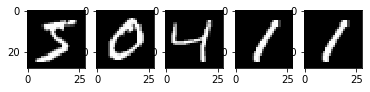

In [4]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()

# model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 13s - loss: 0.3752 - accuracy: 0.8806 - val_loss: 0.0827 - val_accuracy: 0.9757
Epoch 2/20
60000/60000 - 4s - loss: 0.0932 - accuracy: 0.9710 - val_loss: 0.0494 - val_accuracy: 0.9829
Epoch 3/20
60000/60000 - 3s - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.0414 - val_accuracy: 0.9857
Epoch 4/20
60000/60000 - 3s - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0384 - val_accuracy: 0.9873
Epoch 5/20
60000/60000 - 3s - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.0308 - val_accuracy: 0.9893
Epoch 6/20
60000/60000 - 3s - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0276 - val_accuracy: 0.9905
Epoch 7/20
60000/60000 - 3s - loss: 0.0381 - accuracy: 0.9876 - val_loss: 0.0260 - val_accuracy: 0.9902
Epoch 8/20
60000/60000 - 3s - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0255 - val_accuracy: 0.9915
Epoch 9/20
60000/60000 - 3s - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0235 - val_accuracy: 0.9915
Epoch 10/20
6

In [11]:
model.save("model.h5")

In [ ]:
!tensorflowjs_converter --input_format keras "model.h5" "js_model"
# dont include space in your directories